In [37]:
# Data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imputing missing values
from sklearn.impute import KNNImputer

from scipy.stats import chi2_contingency

# Feature engineering
from sklearn.preprocessing import StandardScaler

# Model processing and testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("stroke_data.csv")

In [3]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
#replacing NULL value with mean
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [5]:
df = df.drop('id', axis=1) #id column not necessary


In [167]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.051434,0,1,1,2.706375,1.001234e+00,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0.786070,0,0,1,2.121559,4.615554e-16,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1.626390,0,1,1,-0.005028,4.685773e-01,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.255342,0,0,1,1.437358,7.154182e-01,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1.582163,1,0,1,1.501184,-6.357112e-01,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [173]:
df.isnull().sum() 

age                      0
hypertension             0
heart_disease            0
ever_married             0
avg_glucose_level        0
bmi                      0
stroke                   0
sex_Female               0
sex_Male                 0
sex_Other                0
work_Govt_job            0
work_Never_worked        0
work_Private             0
work_Self-employed       0
work_children            0
residence_Rural          0
residence_Urban          0
smoke_Unknown            0
smoke_formerly smoked    0
smoke_never smoked       0
smoke_smokes             0
dtype: int64

In [9]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
df = pd.get_dummies(df, columns = ['gender', 'work_type', 'Residence_type', 'smoking_status'], prefix = ['sex', 'work', 'residence', 'smoke'])
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,67.0,0,1,Yes,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,Yes,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,Yes,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,Yes,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,Yes,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [11]:
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,67.0,0,1,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,1,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [12]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [13]:
df.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.051434,0,1,1,2.706375,1.001234e+00,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0.786070,0,0,1,2.121559,4.615554e-16,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1.626390,0,1,1,-0.005028,4.685773e-01,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.255342,0,0,1,1.437358,7.154182e-01,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1.582163,1,0,1,1.501184,-6.357112e-01,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


# Model Building 

In [14]:
x = df.drop('stroke', axis = 1)
y = df['stroke']


smote = SMOTE()

x_oversample, y_oversample = smote.fit_resample(x, y)

print(y.value_counts())
print(y_oversample.value_counts())

0    4861
1     249
Name: stroke, dtype: int64
0    4861
1    4861
Name: stroke, dtype: int64


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size = 0.2, random_state = 0)

# Logistic Regression

In [16]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
cr = classification_report(y_test, y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       973
           1       0.87      0.85      0.86       972

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945



In [17]:
print('Precision Score: ', round(precision_score(y_test, y_pred_log), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_log), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_log), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_log), 2))

Precision Score:  0.87
Recall Score:  0.85
F1 Score:  0.86
Accuracy Score:  0.86
ROC AUC:  0.86


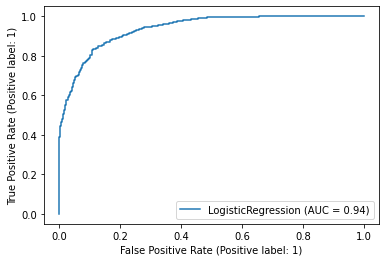

In [69]:
plot_roc_curve(log, x_test, y_test)


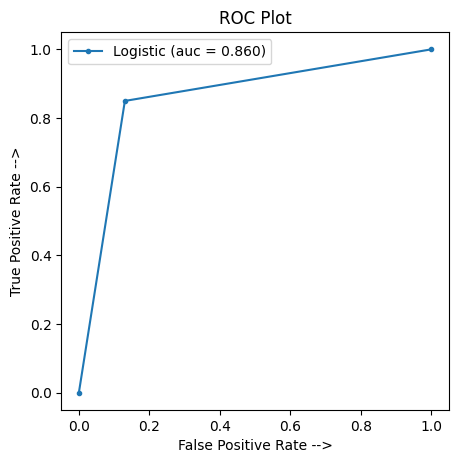

In [72]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_log)
auc_logistic = auc(logistic_fpr, logistic_tpr)

#svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
#auc_svm = auc(svm_fpr, svm_tpr)


plt.figure(figsize=(5, 5), dpi=100)
#plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.title('ROC Plot')

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [75]:
r_fpr, r_tpr, _ = roc_curve(y_test, y_pred_log)
r_auc = roc_auc_score(y_test, y_pred_log)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))


Random (chance) Prediction: AUROC = 0.860


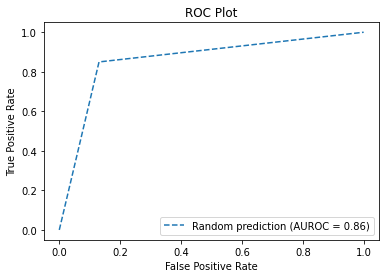

In [94]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.2f)' % r_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Random Forest

In [19]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       973
           1       0.94      0.98      0.96       972

    accuracy                           0.95      1945
   macro avg       0.96      0.95      0.95      1945
weighted avg       0.96      0.95      0.95      1945



In [169]:
print('Precision Score: ', round(precision_score(y_test, y_pred_rf), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_rf), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_rf), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_rf), 2))

Precision Score:  0.94
Recall Score:  0.98
F1 Score:  0.96
Accuracy Score:  0.955
ROC AUC:  0.95


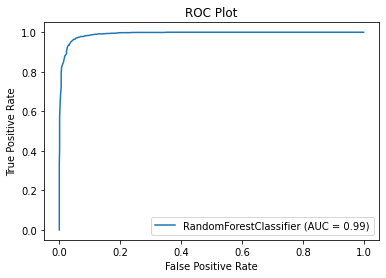

In [93]:
plot_roc_curve(rf, x_test, y_test)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

<AxesSubplot:>

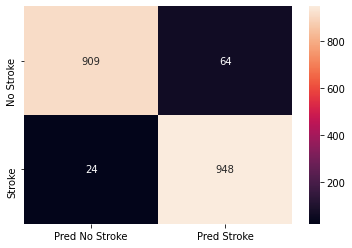

In [61]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

# K-Nearest Neighbors

In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       973
           1       0.86      0.98      0.91       972

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945



In [172]:
print('Precision Score: ', round(precision_score(y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_knn), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_knn), 2))

Precision Score:  0.86
Recall Score:  0.98
F1 Score:  0.914
Accuracy Score:  0.91
ROC AUC:  0.91


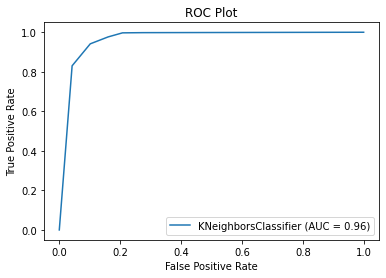

In [92]:
plot_roc_curve(knn, x_test, y_test)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

<AxesSubplot:>

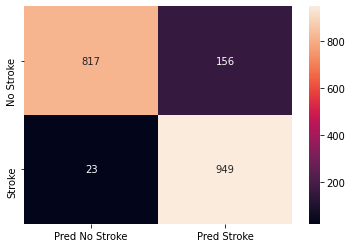

In [62]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

# SVM

In [27]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
cr_svm = classification_report(y_test, y_pred_knn)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       973
           1       0.86      0.98      0.91       972

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945



In [50]:
print('Precision Score: ', round(precision_score(y_test, y_pred_svm), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_svm), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_svm), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_svm), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_svm), 3))

Precision Score:  0.88
Recall Score:  0.92
F1 Score:  0.903
Accuracy Score:  0.901
ROC AUC:  0.901


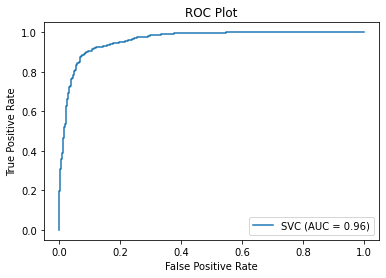

In [91]:
plot_roc_curve(svm, x_test, y_test)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Decision Tree

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       973
           1       0.90      0.91      0.91       972

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



In [46]:
print('Precision Score: ', round(precision_score(y_test, y_pred_dt), 3))
print('Recall Score: ', round(recall_score(y_test, y_pred_dt), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_dt), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_dt), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_dt), 2))

Precision Score:  0.898
Recall Score:  0.91
F1 Score:  0.91
Accuracy Score:  0.91
ROC AUC:  0.91


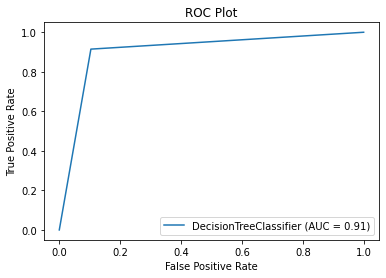

In [90]:
plot_roc_curve(dt, x_test, y_test)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


# GaussianNB

In [38]:
bx = GaussianNB()
bx.fit(x_train, y_train)
y_pred_bx = bx.predict(x_test)
cr_bx = classification_report(y_test, y_pred_bx)
print(cr_bx)

              precision    recall  f1-score   support

           0       0.98      0.16      0.28       973
           1       0.54      1.00      0.70       972

    accuracy                           0.58      1945
   macro avg       0.76      0.58      0.49      1945
weighted avg       0.76      0.58      0.49      1945



In [45]:
print('Precision Score: ', round(precision_score(y_test, y_pred_bx), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_bx), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_bx), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_bx), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_bx), 2))

Precision Score:  0.54
Recall Score:  0.997
F1 Score:  0.703
Accuracy Score:  0.579
ROC AUC:  0.58


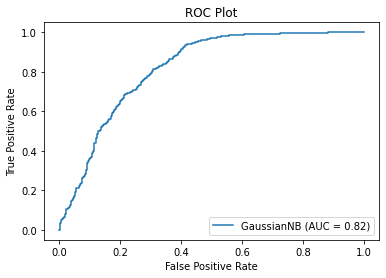

In [66]:
plot_roc_curve(bx, x_test, y_test)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


# Calculating ROC Curve

In [87]:
r_fpr, r_tpr, _ = roc_curve(y_test, y_pred_log)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_pred_knn)




#printing auroc values

r_auc = roc_auc_score(y_test, y_pred_log)
rf_auc = roc_auc_score(y_test, y_pred_rf)
nb_auc = roc_auc_score(y_test, y_pred_knn)
svm_auc = roc_auc_score(y_test, y_pred_svm)
dt_auc = roc_auc_score(y_test, y_pred_dt)
gb_auc = roc_auc_score(y_test, y_pred_bx)



print('Logistic Regression: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('KNN: AUROC = %.3f' % (nb_auc))




Logistic Regression: AUROC = 0.860
Random Forest: AUROC = 0.955
KNN: AUROC = 0.908


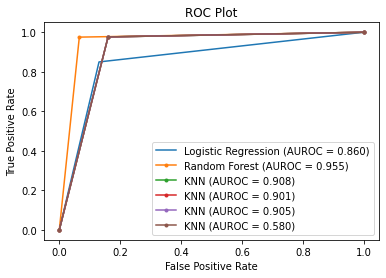

In [89]:
plt.plot(r_fpr, r_tpr, label='Logistic Regression (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='KNN (AUROC = %0.3f)' % nb_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='KNN (AUROC = %0.3f)' % svm_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='KNN (AUROC = %0.3f)' % dt_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='KNN (AUROC = %0.3f)' % gb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# MAIN ROC CURVE

# LOGISTIC REGRESSION

In [95]:
auc = roc_auc_score(y_test, y_pred_log)
auc

0.8596350432881208

In [96]:
cm = confusion_matrix(y_test, y_pred_log)
cm


array([[846, 127],
       [146, 826]])

In [98]:
predicted_probab_log = log.predict_proba(x_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

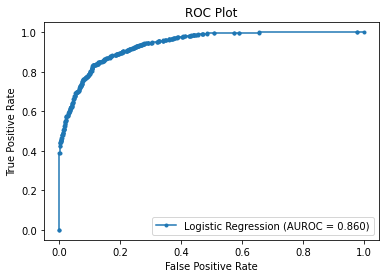

In [118]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)'% r_auc)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# RF

In [125]:
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_rf

0.9547663456536357

In [114]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf


array([[909,  64],
       [ 24, 948]])

In [115]:
predicted_probab_rf = rf.predict_proba(x_test)
predicted_probab_rf = predicted_probab_rf[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, predicted_probab_rf)

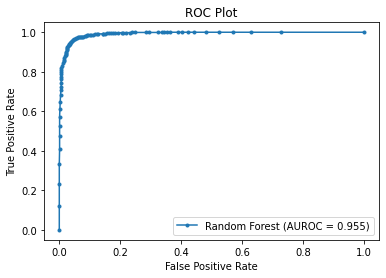

In [123]:
from matplotlib import pyplot
pyplot.plot(fpr2, tpr2, marker='.', label='Random Forest (AUROC = %0.3f)'% auc_rf)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# KNN

In [126]:
auc_knn = roc_auc_score(y_test, y_pred_knn)
auc_knn

0.9080042844031653

In [127]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[817, 156],
       [ 23, 949]])

In [139]:
predicted_probab_knn = knn.predict_proba(x_test)
predicted_probab_knn = predicted_probab_knn[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, predicted_probab_knn)

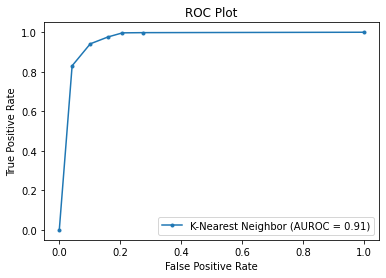

In [140]:
from matplotlib import pyplot
pyplot.plot(fpr3, tpr3, marker='.', label='K-Nearest Neighbor (AUROC = %0.2f)'% auc_knn)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# SVM

In [141]:
auc_svm = roc_auc_score(y_test, y_pred_svm)
auc_svm

0.9007820198867361

In [142]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[856, 117],
       [ 76, 896]])

In [145]:
predicted_probab_svm = svm.predict_proba(x_test)
predicted_probab_svm = predicted_probab_svm[:, 1]
fpr4, tpr4, _ = roc_curve(y_test, predicted_probab_svm)

AttributeError: predict_proba is not available when  probability=False

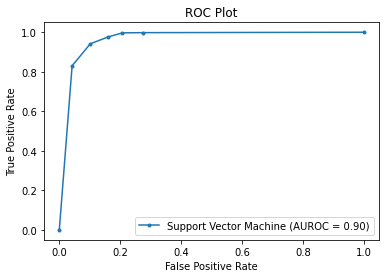

In [147]:
from matplotlib import pyplot
pyplot.plot(fpr4, tpr4, marker='.', label='Support Vector Machine (AUROC = %0.2f)'% auc_svm)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# DT

In [150]:
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_dt

0.9054031906749733

In [151]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[872, 101],
       [ 83, 889]])

In [153]:
predicted_probab_dt = dt.predict_proba(x_test)
predicted_probab_dt = predicted_probab_dt[:, 1]
fpr5, tpr5, _ = roc_curve(y_test, predicted_probab_dt)

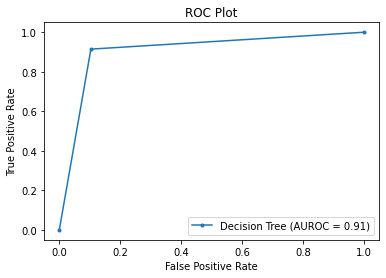

In [154]:
from matplotlib import pyplot
pyplot.plot(fpr5, tpr5, marker='.', label='Decision Tree (AUROC = %0.2f)'% auc_dt)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# GaussianNB 

In [162]:
auc_nb = roc_auc_score(y_test, y_pred_bx)
auc_nb

0.5796489792293149

In [156]:
cm_bx = confusion_matrix(y_test, y_pred_bx)
cm_bx

array([[158, 815],
       [  3, 969]])

In [160]:
predicted_probab_bx = bx.predict_proba(x_test)
predicted_probab_bx = predicted_probab_bx[:, 1]
fpr6, tpr6, _ = roc_curve(y_test, predicted_probab_bx)

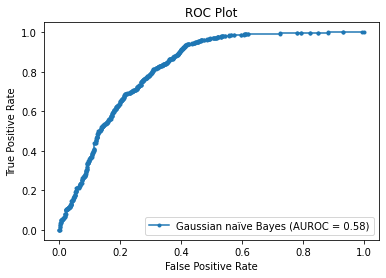

In [175]:
from matplotlib import pyplot
pyplot.plot(fpr6, tpr6, marker='.', label='Gaussian naïve Bayes (AUROC = %0.2f)'% auc_nb)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [168]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,sex_Other,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.051434,0,1,1,2.706375,1.001234e+00,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0.786070,0,0,1,2.121559,4.615554e-16,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1.626390,0,1,1,-0.005028,4.685773e-01,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.255342,0,0,1,1.437358,7.154182e-01,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1.582163,1,0,1,1.501184,-6.357112e-01,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
